<a href="https://colab.research.google.com/github/hirohitokato/ohm_princess_pytorch/blob/main/Chapter2_chainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pythonで機械学習入門機械学習入門(Chainer版) **Chapter2**

pytorch版が正しく動いているかわからないのでChainerで動かしてみる

In [16]:
!pip install chainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable, Chain, config

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  y = x * x
  return y

D = 100
N = 2
C = 2
xdata = np.random.randn(D*N).reshape(D,N).astype(np.float32)
tdata = (xdata[:,1]>f(xdata[:,0])).astype(np.int32)

In [27]:
NN = Chain(l1=L.Linear(N,4), l2=L.Linear(4,C))
def model(x):
  h = NN.l1(x)
  h = F.sigmoid(h)
  y = NN.l2(h)
  return y

In [28]:
ydata = model(xdata)
acc = F.accuracy(ydata, tdata)

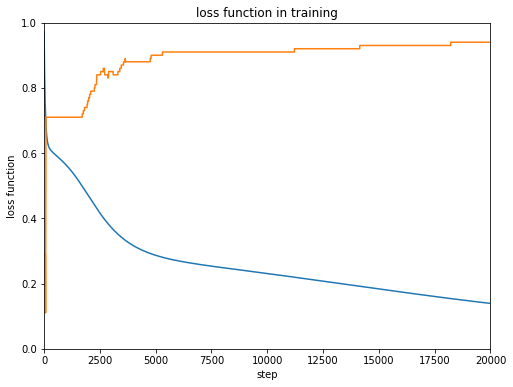

In [29]:
optNN = Opt.SGD()
optNN.setup(NN)

loss_series = []
acc_series = []

T = 20000
for time in range(T):
  config.train = True
  optNN.target.zerograds()
  ydata = model(xdata)
  loss = F.softmax_cross_entropy(ydata, tdata)
  acc = F.accuracy(ydata, tdata)
  loss.backward()
  optNN.update()
  loss_series.append(loss.data)
  acc_series.append(acc.data)

Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), loss_series)
plt.plot(range(Tall), acc_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()